# Дз 1: Градиентный спуск

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2]])
X

array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  2,  5,  3,  0,  5, 10,  1,  2]])

In [3]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

## 1. Подберите скорость обучения (alpha) и количество итераций

Ошибку в строке уже исправили. Мне остается только подобрать параметр

In [4]:
def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2) # <=> 1/n * np.sum((y_pred - y)**2)
    return err

In [5]:
def grad_desc(X, alpha):
    n = X.shape[1]
    W = np.array([1, 0.5])
    
    for i in range(100):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        for k in range(len(W)):
            W[k] -= alpha * (1/n * 2 * np.sum(X[k] * (y_pred - y)))
        if i % 10 == 0:
            alpha /= 1.1
    return W, err, alpha

In [6]:
n = X.shape[1]
alpha = 1e-2
W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')

for i in range(100):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    for k in range(len(W)):
        W[k] -= alpha * (1/n * 2 * np.sum(X[k] * (y_pred - y)))
    if i % 10 == 0:
        alpha /= 1.1
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [2.08 4.27], MSE = 3047.75
Iteration #10: W_new = [ 6.67106886 10.61676385], MSE = 749.71
Iteration #20: W_new = [ 9.49320908 10.25731657], MSE = 648.91
Iteration #30: W_new = [11.85740092  9.83349244], MSE = 570.46
Iteration #40: W_new = [13.86876921  9.46898661], MSE = 508.03
Iteration #50: W_new = [15.59085668  9.15672679], MSE = 457.73
Iteration #60: W_new = [17.07337653  8.88789585], MSE = 416.77
Iteration #70: W_new = [18.35601294  8.65530964], MSE = 383.06
Iteration #80: W_new = [19.47073522  8.45317196], MSE = 355.08
Iteration #90: W_new = [20.44350656  8.27677488], MSE = 331.65


__Задача:__ предсказание баллов ЕГЭ ученика в зависимости от кол-ва лет стажа его репетитора

In [7]:
alpha_seq = np.arange(1., 1e-6, -0.001)
result = {}
W_i = []
for alpha in alpha_seq:
    W_i, res_i, alpha = grad_desc(X, alpha)
    result[res_i] =  [W_i, alpha]



### Ответ

In [8]:
MSE_best = min(result.keys())
W_best = result[min(result.keys())][0]
alpha_best = result[min(result.keys())][1]
print(f'Best MSE: {round(MSE_best, 2 )}, \nW_best = {W_best}')


Best MSE: 43.98, 
W_best = [44.89700069  3.84196025]


In [9]:
#y_pred = W_i @ X
y_pred = W[0] * X[0] + W[1] * X[1]

In [10]:
result[min(result.keys())][0]

array([44.89700069,  3.84196025])

In [11]:
y_pred1 = 35 * np.ones(10) + X[1]*5
y_pred2 = 40 * np.ones(10) + X[1]*7.5

y_pred3 = result[min(result.keys())][0][0] * X[0] + result[min(result.keys())][0][1] * X[1]

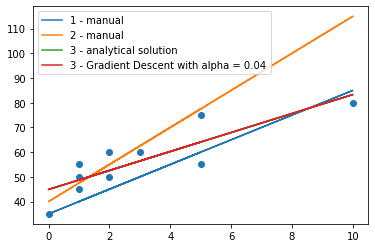

In [12]:
plt.scatter(X[1], y)
plt.plot(X[1], y_pred1, label='1 - manual')
plt.plot(X[1], y_pred2, label='2 - manual')
plt.plot(X[1], y_pred3, label='3 - analytical solution')
plt.plot(X[1], y_pred3, label=f'3 - Gradient Descent with alpha = {round(alpha_best, 2)}')
plt.legend()
plt.show()

## *2. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее

In [13]:
n = X.shape[1]
alpha = 0.04
W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')

for i in range(100):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    #for k in range(W.shape[0]):
    #     W[k] -= alpha * (1/n * 2 * np.sum(X[k] * (y_pred - y)))
    W -= alpha * (1/n * 2 * X @ (y_pred - y).T)
    W_pred = W
    
    if i % 10 == 0:
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 10        
Learning rate = 0.04        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [ 5.32 15.58], MSE = 3047.75
Iteration #10: W_new = [17.10326214  8.88299874], MSE = 440.56
Iteration #20: W_new = [25.78123866  7.30885952], MSE = 232.58
Iteration #30: W_new = [31.76579204  6.22365298], MSE = 133.67
Iteration #40: W_new = [35.89284874  5.47527488], MSE = 86.63
Iteration #50: W_new = [38.73894198  4.95917975], MSE = 64.26
Iteration #60: W_new = [40.70165956  4.60327118], MSE = 53.62
Iteration #70: W_new = [42.05518524  4.35783016], MSE = 48.56
Iteration #80: W_new = [42.98860113  4.18856958], MSE = 46.15
Iteration #90: W_new = [43.63230168  4.07184441], MSE = 45.01


## *3. Вместо того, чтобы задавать количество итераций, задайте условие остановки алгоритма - когда ошибка за итерацию начинает изменяться ниже определенного порога (упрощенный аналог параметра tol в линейной регрессии в sklearn).

In [14]:
a = np.array([1, 1])
b = np.array([0, 1])

a@b

1

In [15]:
n = X.shape[1]
alpha = 0.04
eps = 1e-16
W = np.array([1., 0.5])
err_prev = 0.
print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')
i = 0
#for i in range(100):
while (1):
    i += 1
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    W -= alpha * (1/n * 2 * X @ (y_pred - y).T)
    if np.mean((err-err_prev)**2) <= eps:
        print(f'Stopped on step: {i:<10}W = {W} \nW_new = {W}, ++++ MSE = {round(err,2)} ++++')
        break
    err_prev = err
    W_pred = W
    
    
    
    if i % 10 == 0:
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 10        
Learning rate = 0.04        
Initial weights = [1.  0.5] 

Iteration #10: W_new = [16.0443793   9.07319509], MSE = 471.16
Iteration #20: W_new = [25.05123363  7.44123447], MSE = 247.13
Iteration #30: W_new = [31.26236734  6.31494128], MSE = 140.59
Iteration #40: W_new = [35.54567792  5.53822895], MSE = 89.92
Iteration #50: W_new = [38.49952668  5.00259402], MSE = 65.82
Iteration #60: W_new = [40.53655442  4.63321045], MSE = 54.36
Iteration #70: W_new = [41.94132574  4.37847683], MSE = 48.91
Iteration #80: W_new = [42.91008155  4.2028079 ], MSE = 46.32
Iteration #90: W_new = [43.57815315  4.08166341], MSE = 45.09
Iteration #100: W_new = [44.03886746  3.99811998], MSE = 44.5
Iteration #110: W_new = [44.35658441  3.94050691], MSE = 44.22
Iteration #120: W_new = [44.57568779  3.90077589], MSE = 44.09
Iteration #130: W_new = [44.72678546  3.87337666], MSE = 44.03
Iteration #140: W_new = [44.83098516  3.85448165], MSE = 44.0
Iteration #150: W_new = [44.90284316

## Выводы

* $\alpha$ был подобран итеративно, и выбран лучший вариант $\Rightarrow$ уже есть улучшение
* Уточнение изменения ошибки привело к лучшему результату. Здесь все ок, но надо приучить себя и по кол-вам итерации тоже ограничить
* В вашем коде alpha через каждые 10 итераций уменьшается в 1.1 раз, для меня интуитивно это кажется разумным, но в последних вычислениях лишь портит результат. Тогда вопрос: как разумнее этот коэффициент подбирать?
* Начальное W тоже пытался менять, но на ответе не сказалось: оно и логично - имеем дело с квадратичной функцией с одним локальным минимумом, верно?